# Linear Regression Analysis

## World Happiness Report
#### Description: This dataset contains information about happiness scores and various contributing factors such as GDP per capita, social support, and life expectancy across different countries. It can be used to predict happiness scores based on these features using linear regression."

## Perform Linear Regression using the selected continuous dependent variable.

## Part 1: Data Preprocessing: Handle missing values, outliers, and normalize data if necessary.

### 1.1 Importing the dataset and required libraries, modules, and functions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data_2015 = pd.read_csv('C:/Users/User/Downloads/2015/2015.csv')

In [2]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### 1.2 Checking for missing values in the dataset

In [3]:
# Check for missing values in the dataset
data_2015.isnull().sum()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### 1.3 Standardizing Features

In [4]:
# Selecting relevant independent variables and dependent variable (Happiness Score)

X = data_2015[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
          'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
y = data_2015['Happiness Score']

In [5]:
# Data Preprocessing: Normalize the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 1.4 Getting the Inputs and Outputs

In [6]:
# [rows,columns]
X = data_2015.iloc[:,5:12].values
X

array([[1.39651, 1.34951, 0.94143, ..., 0.41978, 0.29678, 2.51738],
       [1.30232, 1.40223, 0.94784, ..., 0.14145, 0.4363 , 2.70201],
       [1.32548, 1.36058, 0.87464, ..., 0.48357, 0.34139, 2.49204],
       ...,
       [0.6632 , 0.47489, 0.72193, ..., 0.18906, 0.47179, 0.32858],
       [0.0153 , 0.41587, 0.22396, ..., 0.10062, 0.19727, 1.83302],
       [0.20868, 0.13995, 0.28443, ..., 0.10731, 0.16681, 1.56726]])

In [7]:
# [rows,columns]
y = data_2015.iloc[:,3].values
y

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073,
       5.057, 5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876,
       4.874, 4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715,
       4.694, 4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565,
       4.55 , 4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369,
       4.35 , 4.332,

### 1.5 Creating the Training Set and the Test Set

In [8]:
# scikitlearn is a library
# model_selection is a module
# train_test_split is a function (libro)

#Splitting data into training and testing sets (80% train, 20% test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



In [9]:
X_train

array([[2.60740e-01, 1.03526e+00, 2.05830e-01, 3.88570e-01, 1.23520e-01,
        1.87980e-01, 1.79293e+00],
       [1.14723e+00, 1.25745e+00, 7.31280e-01, 2.13420e-01, 1.03100e-02,
        2.64100e-02, 2.44649e+00],
       [7.68210e-01, 7.77110e-01, 7.29900e-01, 1.98470e-01, 3.90000e-02,
        7.85500e-02, 1.75873e+00],
       [4.70380e-01, 9.16120e-01, 2.99240e-01, 4.88270e-01, 1.24680e-01,
        1.95910e-01, 2.63430e+00],
       [2.86650e-01, 3.53860e-01, 3.19100e-01, 4.84500e-01, 8.01000e-02,
        1.82600e-01, 1.63328e+00],
       [7.45530e-01, 1.04356e+00, 6.44250e-01, 5.77330e-01, 9.47200e-02,
        2.74890e-01, 2.74255e+00],
       [9.39290e-01, 1.07772e+00, 6.17660e-01, 2.85790e-01, 1.73830e-01,
        7.82200e-02, 2.43209e+00],
       [5.21070e-01, 1.01404e+00, 3.68780e-01, 1.00810e-01, 1.46600e-01,
        1.90620e-01, 2.20857e+00],
       [1.10715e+00, 1.12447e+00, 8.58570e-01, 4.41320e-01, 1.28690e-01,
        3.33630e-01, 2.67585e+00],
       [7.57780e-01, 8.60400

In [10]:
X_test

array([[2.71080e-01, 7.09050e-01, 4.82460e-01, 4.40170e-01, 1.90340e-01,
        7.95880e-01, 1.41805e+00],
       [1.27074e+00, 1.25712e+00, 9.91110e-01, 4.96150e-01, 1.80600e-01,
        1.07050e-01, 1.68435e+00],
       [8.81800e-01, 7.47000e-01, 6.17120e-01, 1.72880e-01, 6.32400e-02,
        1.12910e-01, 1.59927e+00],
       [1.53000e-02, 4.15870e-01, 2.23960e-01, 1.18500e-01, 1.00620e-01,
        1.97270e-01, 1.83302e+00],
       [1.88470e-01, 9.51520e-01, 4.38730e-01, 4.65820e-01, 3.99280e-01,
        5.03180e-01, 2.11032e+00],
       [1.05351e+00, 1.24823e+00, 7.87230e-01, 4.49740e-01, 8.48400e-02,
        1.14510e-01, 2.83600e+00],
       [3.75450e-01, 1.04103e+00, 7.61200e-02, 3.17670e-01, 1.25040e-01,
        1.63880e-01, 2.79832e+00],
       [5.90660e-01, 7.38030e-01, 5.49090e-01, 5.95910e-01, 2.42490e-01,
        4.21920e-01, 1.73799e+00],
       [8.32230e-01, 9.19160e-01, 7.90810e-01, 9.24500e-02, 2.27000e-03,
        2.48080e-01, 2.06367e+00],
       [2.11020e-01, 1.13299

In [11]:
y_train

array([3.995, 5.833, 4.35 , 5.129, 3.34 , 6.123, 5.605, 4.55 , 6.67 ,
       4.033, 5.253, 3.656, 6.302, 5.286, 6.81 , 4.218, 3.904, 7.226,
       5.212, 5.589, 4.436, 6.611, 5.123, 4.332, 6.13 , 7.427, 6.477,
       5.77 , 3.587, 5.689, 6.946, 4.419, 7.278, 4.694, 4.788, 7.587,
       4.61 , 5.709, 5.995, 5.192, 6.575, 6.168, 3.819, 6.75 , 6.798,
       4.677, 6.269, 5.124, 4.857, 3.465, 4.252, 5.975, 4.571, 5.759,
       5.399, 6.455, 4.786, 4.642, 4.517, 5.754, 4.959, 4.885, 5.855,
       7.406, 4.681, 4.518, 5.948, 6.329, 5.194, 5.268, 6.411, 5.984,
       7.364, 6.003, 5.477, 3.678, 5.013, 5.14 , 3.896, 3.845, 5.073,
       7.286, 4.633, 7.187, 5.791, 4.077, 7.522, 6.94 , 6.295, 5.429,
       3.989, 7.378, 4.271, 4.867, 7.527, 4.514, 5.716, 5.848, 4.715,
       5.89 , 3.006, 5.813, 5.96 , 5.098, 6.853, 5.824, 3.575, 4.297,
       6.298, 3.667, 7.561, 5.878, 4.292, 4.8  , 4.874, 4.565, 5.102,
       5.36 , 4.512, 2.839, 6.867, 5.474, 4.739, 7.119, 5.007, 4.839])

In [12]:
y_test

array([4.307, 5.987, 4.194, 2.905, 5.057, 6.574, 4.898, 4.876, 4.949,
       3.931, 6.901, 5.828, 6.983, 5.548, 6.786, 6.505, 4.507, 4.686,
       4.971, 5.695, 3.655, 6.937, 7.2  , 7.284, 6.485, 5.192, 5.889,
       3.956, 4.369, 3.681, 3.781, 5.332])

## Part 2 - Building and Training the Model

### 2.1 Building the model

In [13]:
# linear_model is the module
# `LinearRegression is a class` is defining that `LinearRegression` is a class within the `linear_model` module. It indicates that `LinearRegression` is a blueprint or template for creating objects that represent linear regression models.
# Class is a pre-coded blueprint of something we want to build from which objects are created.

from sklearn.linear_model import LinearRegression
model = LinearRegression()

### 2.2 Training the Model

In [14]:
# fit is a method inside LinearRegression class - they are like functions.
model.fit(X_train, y_train)

LinearRegression()

### 2.3 Inference

In [15]:
#Predicted Values

y_pred = model.predict(X_test)
y_pred

array([4.30689895, 5.98710561, 4.19426044, 2.90453085, 5.05721508,
       6.57407824, 4.89753373, 4.8760068 , 4.94869803, 3.93078591,
       6.90137991, 5.82829366, 6.98259958, 5.54817142, 6.78625343,
       6.50510386, 4.50718067, 4.68555198, 4.9710959 , 5.695315  ,
       3.65506901, 6.93738233, 7.19984324, 7.28401572, 6.48514639,
       5.19231489, 5.8889859 , 3.9556194 , 4.36917273, 3.68084119,
       3.78077004, 5.33248774])

In [16]:
#Actual Values

y_test

array([4.307, 5.987, 4.194, 2.905, 5.057, 6.574, 4.898, 4.876, 4.949,
       3.931, 6.901, 5.828, 6.983, 5.548, 6.786, 6.505, 4.507, 4.686,
       4.971, 5.695, 3.655, 6.937, 7.2  , 7.284, 6.485, 5.192, 5.889,
       3.956, 4.369, 3.681, 3.781, 5.332])

## Part 3: Evaluating the Model

### R-Squared

In [17]:
#Calculating R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9999999484481188

### Adjusted R-Squared

In [18]:
k = X_test.shape[1]
k

7

In [19]:
n = X_test.shape[0]
n
#n is the sample size

32

In [20]:
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
adj_r2

0.9999999334121534

### Mean Squared Error

In [21]:
#Calculating Mean Squared Error
mse_2015 = mean_squared_error(y_test, y_pred)
mse_2015

np.float64(7.313926609499169e-08)

## Part 4: Interpretation: Explain the significance of coefficients and the model's predictive power.

In [22]:
# Coefficients of the linear regression model

coefficients = pd.DataFrame(model.coef_, index=['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'], columns=['Coefficient'])
coefficients

#Interpretation
#The positive coefficient means that the feature increases, the target variable increases. 
#The negative coefficient means that the feature increases, the target variable decreases. 


,Coefficient
Economy,1.000118
Family,0.999968
Health,0.999911
Freedom,0.999836
Trust,0.999990
Generosity,0.999909
Dystopia Residual,1.000028


## Visualization
 

### Actual vs. Predicted Happiness Score

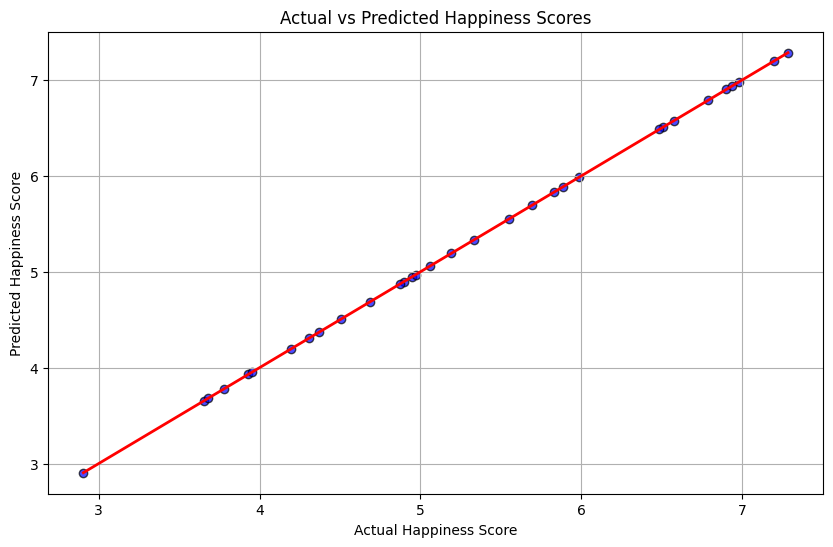

In [23]:
# Plot actual vs predicted happiness scores

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Perfect prediction line
plt.title('Actual vs Predicted Happiness Scores')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.grid(True)
plt.show()

#This plot compares the actual happiness scores from the test data with the predicted scores from the model.
#This plot presents that the model's prediction is align to the actual value.

